In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("bmw.csv.xls")
df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [3]:
print(df.isnull().sum())
print(df.isna().sum())

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [4]:
df.duplicated().sum()

117

In [5]:
df = df.drop_duplicates()


In [6]:
df.duplicated().sum()

0

In [7]:

invalid_year = df[(df['year'] < 1990) | (df['year'] > 2022)]
invalid_price = df[df['price'] <= 0]
valid_transmissions = ["Manual", "Automatic", "Semi-Auto"]
invalid_trans = df[~df['transmission'].isin(valid_transmissions)]
invalid_mileage = df[(df['mileage'] <= 0) | (df['mileage'] > 300000)]
valid_fuels = ["Diesel", "Petrol", "Hybrid", "Electric", "Other"]
invalid_fuel = df[~df['fuelType'].isin(valid_fuels)]
invalid_tax = df[df['tax'] < 0]
invalid_mpg = df[df['mpg'] <= 0]
invalid_engine = df[(df['engineSize'] <= 0) | (df['engineSize'] > 8)]


In [8]:
invalid_checks = {
    "Años fuera de rango": invalid_year.shape[0],
    "Precios inválidos": invalid_price.shape[0],
    "Transmisiones raras": invalid_trans.shape[0],
    "Kilometraje inválido": invalid_mileage.shape[0],
    "FuelType raro": invalid_fuel.shape[0],
    "Tax negativo": invalid_tax.shape[0],
    "mpg inválido": invalid_mpg.shape[0],
    "engineSize inválido": invalid_engine.shape[0]
}

print(invalid_checks)


{'Años fuera de rango': 0, 'Precios inválidos': 0, 'Transmisiones raras': 0, 'Kilometraje inválido': 0, 'FuelType raro': 0, 'Tax negativo': 0, 'mpg inválido': 0, 'engineSize inválido': 47}


In [9]:
df1 =df[df['engineSize'] <=0]
print(df1)

          model  year  price transmission  mileage  fuelType  tax    mpg  \
621          i3  2017  19998    Automatic    41949    Hybrid  140  470.8   
778          i3  2017  19998    Automatic    41146    Hybrid    0  470.8   
780          i3  2017  21898    Automatic    10839    Hybrid    0  470.8   
1866         i3  2017  19980    Automatic    26965    Hybrid  140  470.8   
2352         i3  2016  19490    Automatic     8421    Hybrid    0  470.8   
3277         i3  2016  16482    Automatic    43695    Hybrid    0  470.8   
3628         i3  2015  14285    Automatic    65800    Hybrid    0  470.8   
3913         i3  2017  18500    Automatic    36429    Hybrid    0  470.8   
4100         i3  2017  19495    Automatic    17338    Hybrid  135  470.8   
4109         i3  2015  17481    Automatic     9886    Hybrid    0  470.8   
4211         i3  2015  15498    Automatic    33931    Hybrid    0  470.8   
4749         i3  2014  15450    Automatic    42479    Hybrid    0  470.8   
4866        

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

df_clean = df[df['engineSize'] > 0].copy()
print(f"Datos después de limpieza: {df_clean.shape[0]} registros")
print(f"Variables: {df_clean.columns.tolist()}")


Datos después de limpieza: 10617 registros
Variables: ['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']


In [11]:
le_model = LabelEncoder()
le_transmission = LabelEncoder()
le_fuel = LabelEncoder()

df_clean['model_encoded'] = le_model.fit_transform(df_clean['model'])
df_clean['transmission_encoded'] = le_transmission.fit_transform(df_clean['transmission'])
df_clean['fuelType_encoded'] = le_fuel.fit_transform(df_clean['fuelType'])

features = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_encoded', 'transmission_encoded', 'fuelType_encoded']
X = df_clean[features]
y = df_clean['price']

print("Variables seleccionadas:")
print(features)
print(f"\nForma de X: {X.shape}")
print(f"Forma de y: {y.shape}")


Variables seleccionadas:
['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_encoded', 'transmission_encoded', 'fuelType_encoded']

Forma de X: (10617, 8)
Forma de y: (10617,)


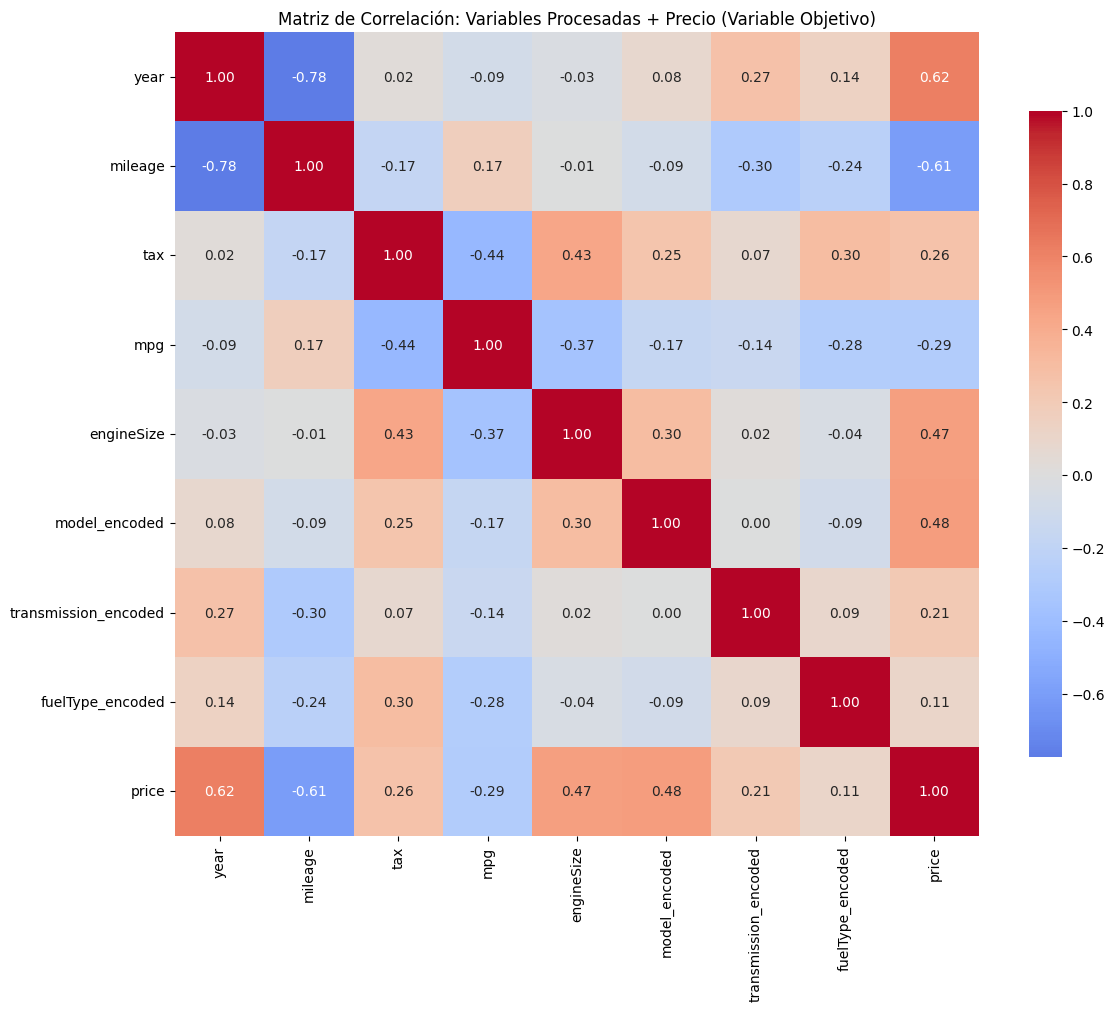

In [12]:
plt.figure(figsize=(12, 10))
correlation_matrix_with_price = df_clean[features + ['price']].corr()
sns.heatmap(correlation_matrix_with_price, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlación: Variables Procesadas + Precio (Variable Objetivo)')
plt.tight_layout()
plt.show()


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Datos de entrenamiento: {X_train.shape[0]} muestras")
print(f"Datos de prueba: {X_test.shape[0]} muestras")


Datos de entrenamiento: 8493 muestras
Datos de prueba: 2124 muestras


In [14]:
X_simple = X_train[['year']].values
X_simple_test = X_test[['year']].values

lr_simple = LinearRegression()
lr_simple.fit(X_simple, y_train)

y_pred_simple = lr_simple.predict(X_simple_test)

mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)
mae_simple = mean_absolute_error(y_test, y_pred_simple)

print("=== REGRESIÓN LINEAL SIMPLE ===")
print(f"MSE: {mse_simple:.2f}")
print(f"R²: {r2_simple:.4f}")
print(f"MAE: {mae_simple:.2f}")
print(f"Coeficiente: {lr_simple.coef_[0]:.2f}")
print(f"Intercepto: {lr_simple.intercept_:.2f}")


=== REGRESIÓN LINEAL SIMPLE ===
MSE: 81406990.69
R²: 0.3770
MAE: 6068.60
Coeficiente: 3087.84
Intercepto: -6205643.53


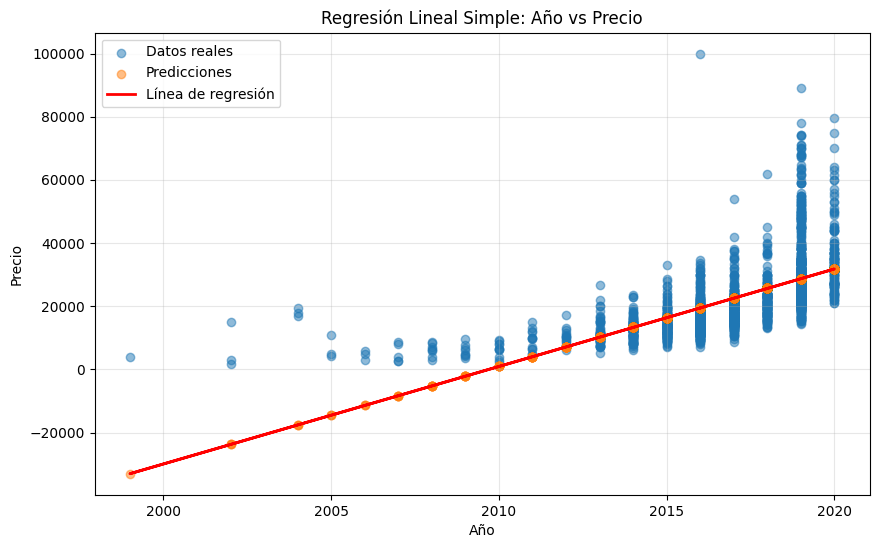

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X_simple_test, y_test, alpha=0.5, label='Datos reales')
plt.scatter(X_simple_test, y_pred_simple, alpha=0.5, label='Predicciones')
plt.plot(X_simple_test, y_pred_simple, color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.title('Regresión Lineal Simple: Año vs Precio')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [16]:
lr_multiple = LinearRegression()
lr_multiple.fit(X_train_scaled, y_train)

y_pred_multiple = lr_multiple.predict(X_test_scaled)

mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)

print("=== REGRESIÓN LINEAL MÚLTIPLE ===")
print(f"MSE: {mse_multiple:.2f}")
print(f"R²: {r2_multiple:.4f}")
print(f"MAE: {mae_multiple:.2f}")

coef_df = pd.DataFrame({
    'Variable': features,
    'Coeficiente': lr_multiple.coef_
})
print("\nCoeficientes:")
print(coef_df)


=== REGRESIÓN LINEAL MÚLTIPLE ===
MSE: 33917549.63
R²: 0.7404
MAE: 3944.08

Coeficientes:
               Variable  Coeficiente
0                  year  4601.396785
1               mileage -2879.570630
2                   tax  -878.305544
3                   mpg  -188.460815
4            engineSize  4734.623580
5         model_encoded  3712.307029
6  transmission_encoded   278.399152
7      fuelType_encoded   576.554151


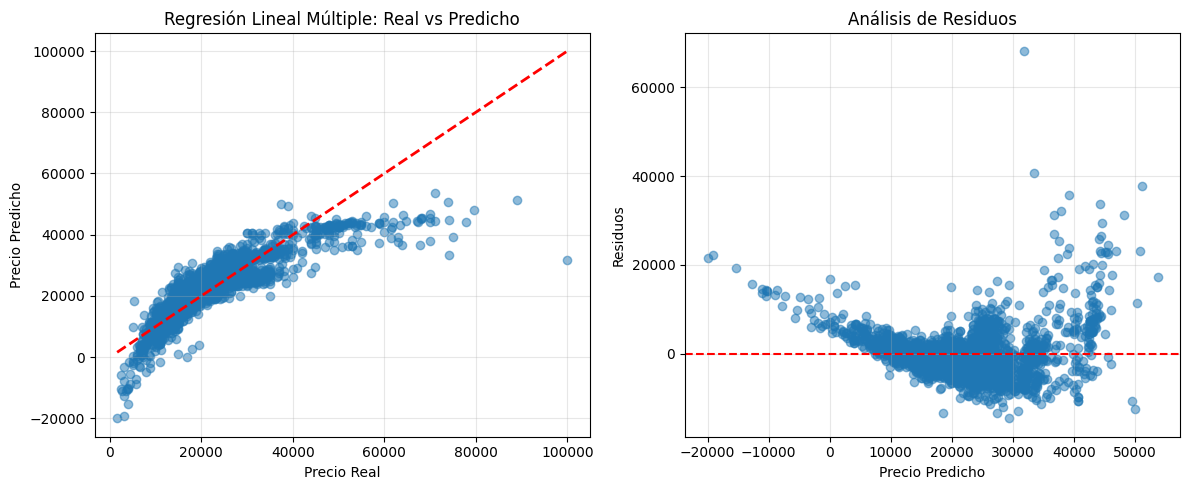

In [17]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_multiple, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Regresión Lineal Múltiple: Real vs Predicho')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals = y_test - y_pred_multiple
plt.scatter(y_pred_multiple, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Precio Predicho')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [18]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print("=== RIDGE REGRESSION ===")
print(f"MSE: {mse_ridge:.2f}")
print(f"R²: {r2_ridge:.4f}")
print(f"MAE: {mae_ridge:.2f}")
print(f"Alpha: {ridge.alpha}")

coef_ridge_df = pd.DataFrame({
    'Variable': features,
    'Coeficiente': ridge.coef_
})
print("\nCoeficientes Ridge:")
print(coef_ridge_df)


=== RIDGE REGRESSION ===
MSE: 33917420.94
R²: 0.7404
MAE: 3944.00
Alpha: 1.0

Coeficientes Ridge:
               Variable  Coeficiente
0                  year  4600.763001
1               mileage -2879.682592
2                   tax  -877.772891
3                   mpg  -188.651540
4            engineSize  4733.840380
5         model_encoded  3711.960808
6  transmission_encoded   278.474679
7      fuelType_encoded   576.273824


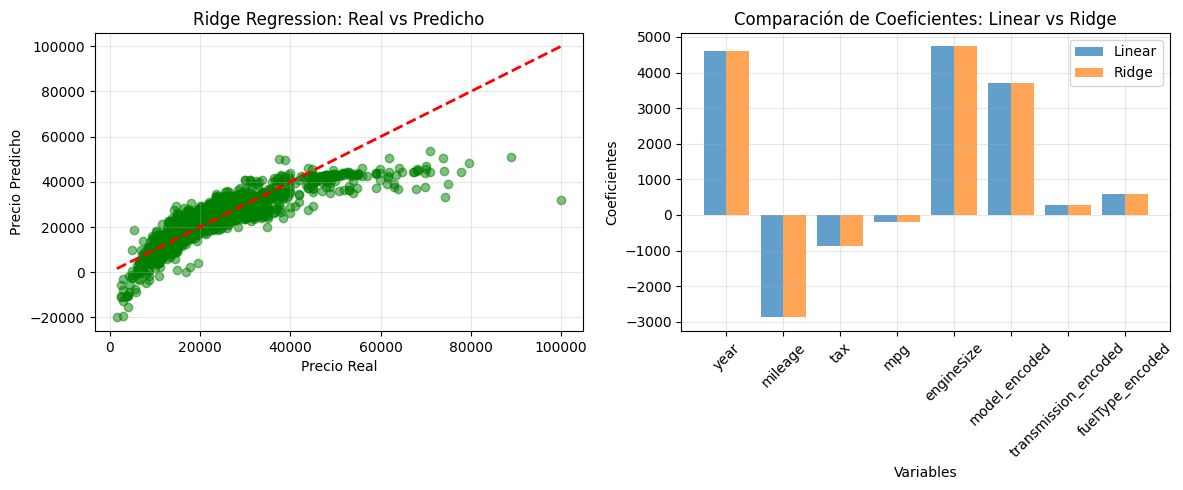

In [19]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Ridge Regression: Real vs Predicho')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
x_pos = range(len(features))
plt.bar([x - 0.2 for x in x_pos], lr_multiple.coef_, 0.4, label='Linear', alpha=0.7)
plt.bar([x + 0.2 for x in x_pos], ridge.coef_, 0.4, label='Ridge', alpha=0.7)
plt.xlabel('Variables')
plt.ylabel('Coeficientes')
plt.title('Comparación de Coeficientes: Linear vs Ridge')
plt.xticks(x_pos, features, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [20]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print("=== LASSO REGRESSION ===")
print(f"MSE: {mse_lasso:.2f}")
print(f"R²: {r2_lasso:.4f}")
print(f"MAE: {mae_lasso:.2f}")
print(f"Alpha: {lasso.alpha}")

coef_lasso_df = pd.DataFrame({
    'Variable': features,
    'Coeficiente': lasso.coef_
})
print("\nCoeficientes Lasso:")
print(coef_lasso_df)
print(f"\nVariables eliminadas (coeficiente = 0): {sum(lasso.coef_ == 0)}")


=== LASSO REGRESSION ===
MSE: 33917630.64
R²: 0.7404
MAE: 3944.05
Alpha: 0.1

Coeficientes Lasso:
               Variable  Coeficiente
0                  year  4601.725435
1               mileage -2879.246364
2                   tax  -877.961389
3                   mpg  -188.378474
4            engineSize  4734.451623
5         model_encoded  3712.171651
6  transmission_encoded   278.312186
7      fuelType_encoded   576.394728

Variables eliminadas (coeficiente = 0): 0


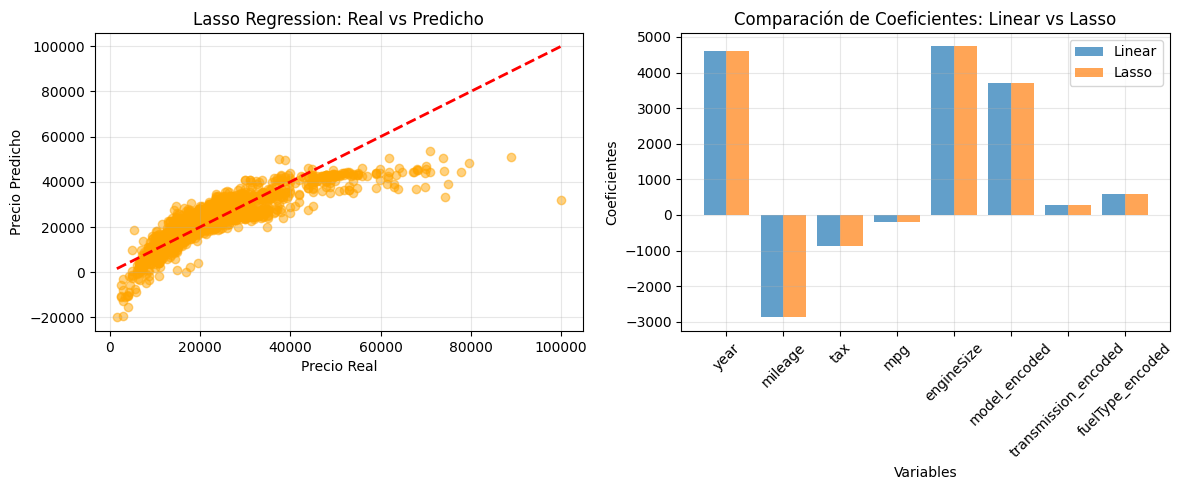

In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Lasso Regression: Real vs Predicho')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
x_pos = range(len(features))
plt.bar([x - 0.2 for x in x_pos], lr_multiple.coef_, 0.4, label='Linear', alpha=0.7)
plt.bar([x + 0.2 for x in x_pos], lasso.coef_, 0.4, label='Lasso', alpha=0.7)
plt.xlabel('Variables')
plt.ylabel('Coeficientes')
plt.title('Comparación de Coeficientes: Linear vs Lasso')
plt.xticks(x_pos, features, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [22]:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train_scaled, y_train)

y_pred_elastic = elastic.predict(X_test_scaled)

mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)

print("=== ELASTIC NET ===")
print(f"MSE: {mse_elastic:.2f}")
print(f"R²: {r2_elastic:.4f}")
print(f"MAE: {mae_elastic:.2f}")
print(f"Alpha: {elastic.alpha}")
print(f"L1 Ratio: {elastic.l1_ratio}")

coef_elastic_df = pd.DataFrame({
    'Variable': features,
    'Coeficiente': elastic.coef_
})
print("\nCoeficientes Elastic Net:")
print(coef_elastic_df)
print(f"\nVariables eliminadas (coeficiente = 0): {sum(elastic.coef_ == 0)}")


=== ELASTIC NET ===
MSE: 34015921.01
R²: 0.7397
MAE: 3918.68
Alpha: 0.1
L1 Ratio: 0.5

Coeficientes Elastic Net:
               Variable  Coeficiente
0                  year  4362.250389
1               mileage -2903.409459
2                   tax  -674.232303
3                   mpg  -261.141532
4            engineSize  4429.452948
5         model_encoded  3571.998669
6  transmission_encoded   308.757253
7      fuelType_encoded   474.482028

Variables eliminadas (coeficiente = 0): 0


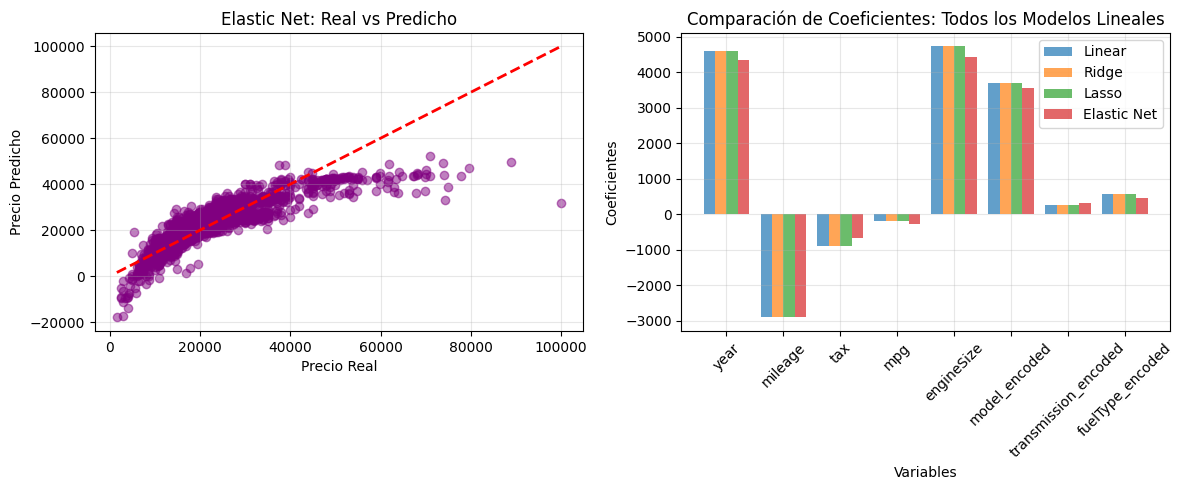

In [23]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_elastic, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Elastic Net: Real vs Predicho')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
x_pos = range(len(features))
width = 0.2
plt.bar([x - 0.3 for x in x_pos], lr_multiple.coef_, width, label='Linear', alpha=0.7)
plt.bar([x - 0.1 for x in x_pos], ridge.coef_, width, label='Ridge', alpha=0.7)
plt.bar([x + 0.1 for x in x_pos], lasso.coef_, width, label='Lasso', alpha=0.7)
plt.bar([x + 0.3 for x in x_pos], elastic.coef_, width, label='Elastic Net', alpha=0.7)
plt.xlabel('Variables')
plt.ylabel('Coeficientes')
plt.title('Comparación de Coeficientes: Todos los Modelos Lineales')
plt.xticks(x_pos, features, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [24]:
tree = DecisionTreeRegressor(max_depth=10, random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)

print("=== ÁRBOLES DE DECISIÓN ===")
print(f"MSE: {mse_tree:.2f}")
print(f"R²: {r2_tree:.4f}")
print(f"MAE: {mae_tree:.2f}")
print(f"Profundidad máxima: {tree.max_depth}")

feature_importance = pd.DataFrame({
    'Variable': features,
    'Importancia': tree.feature_importances_
}).sort_values('Importancia', ascending=False)

print("\nImportancia de las características:")
print(feature_importance)


=== ÁRBOLES DE DECISIÓN ===
MSE: 7627253.79
R²: 0.9416
MAE: 1908.19
Profundidad máxima: 10

Importancia de las características:
               Variable  Importancia
0                  year     0.460788
4            engineSize     0.258668
5         model_encoded     0.148909
1               mileage     0.067843
3                   mpg     0.042873
2                   tax     0.010982
7      fuelType_encoded     0.006615
6  transmission_encoded     0.003322


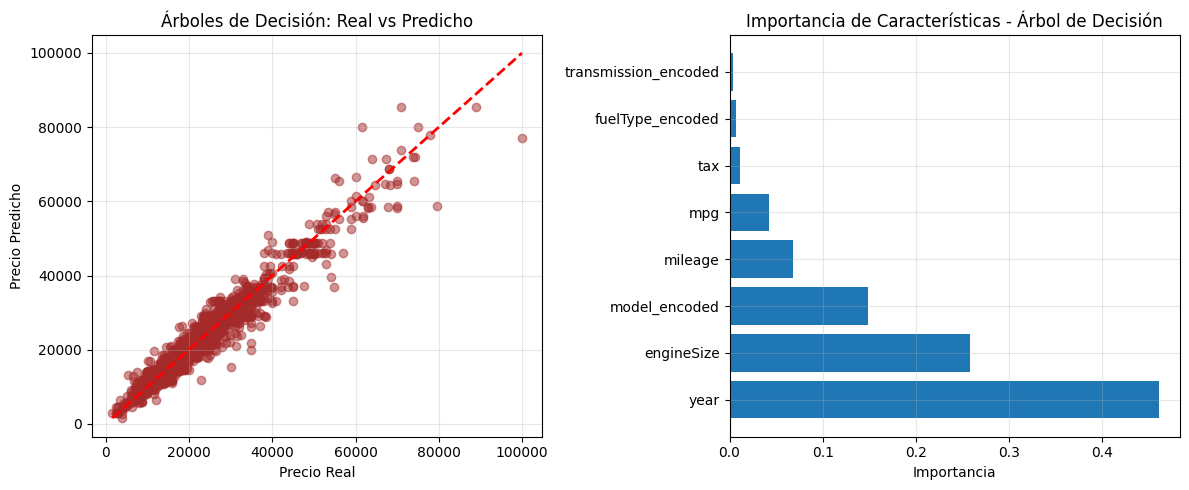

In [25]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_tree, alpha=0.5, color='brown')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Árboles de Decisión: Real vs Predicho')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.barh(feature_importance['Variable'], feature_importance['Importancia'])
plt.xlabel('Importancia')
plt.title('Importancia de Características - Árbol de Decisión')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [26]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("=== RANDOM FOREST ===")
print(f"MSE: {mse_rf:.2f}")
print(f"R²: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.2f}")
print(f"Número de árboles: {rf.n_estimators}")
print(f"Profundidad máxima: {rf.max_depth}")

rf_feature_importance = pd.DataFrame({
    'Variable': features,
    'Importancia': rf.feature_importances_
}).sort_values('Importancia', ascending=False)

print("\nImportancia de las características:")
print(rf_feature_importance)


=== RANDOM FOREST ===
MSE: 6470861.66
R²: 0.9505
MAE: 1752.19
Número de árboles: 100
Profundidad máxima: 10

Importancia de las características:
               Variable  Importancia
0                  year     0.466044
4            engineSize     0.259264
5         model_encoded     0.157724
1               mileage     0.061297
3                   mpg     0.037253
2                   tax     0.010376
7      fuelType_encoded     0.004093
6  transmission_encoded     0.003948


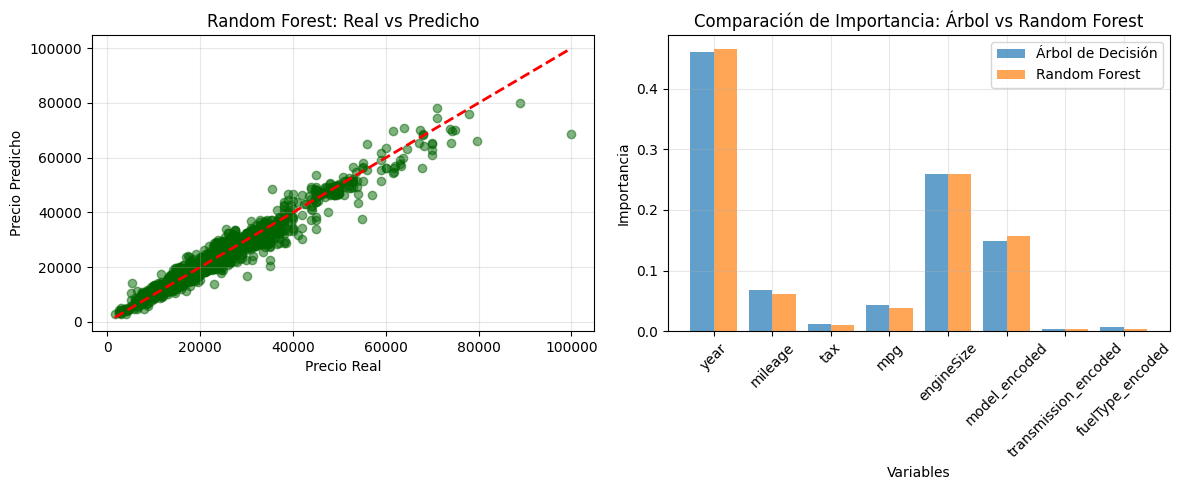

In [27]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='darkgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Random Forest: Real vs Predicho')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
x_pos = range(len(features))
plt.bar([x - 0.2 for x in x_pos], tree.feature_importances_, 0.4, label='Árbol de Decisión', alpha=0.7)
plt.bar([x + 0.2 for x in x_pos], rf.feature_importances_, 0.4, label='Random Forest', alpha=0.7)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Comparación de Importancia: Árbol vs Random Forest')
plt.xticks(x_pos, features, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [28]:
clustering_features = ['year', 'mileage', 'price', 'engineSize']
X_cluster = df_clean[clustering_features].copy()

scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

inertias = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)

kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_cluster_scaled)

df_cluster = df_clean.copy()
df_cluster['cluster'] = cluster_labels

print("=== K-MEANS CLUSTERING ===")
print(f"Número de clusters: {kmeans_final.n_clusters}")
print(f"Inertia: {kmeans_final.inertia_:.2f}")

print("\nEstadísticas por cluster:")
cluster_stats = df_cluster.groupby('cluster')[clustering_features].mean()
print(cluster_stats)


=== K-MEANS CLUSTERING ===
Número de clusters: 3
Inertia: 18356.65

Estadísticas por cluster:
                year       mileage         price  engineSize
cluster                                                     
0        2018.388525  10468.985706  23976.372841    1.896486
1        2017.951330  14572.492223  36336.024084    3.054742
2        2014.720100  53263.569836  13366.123502    2.091413


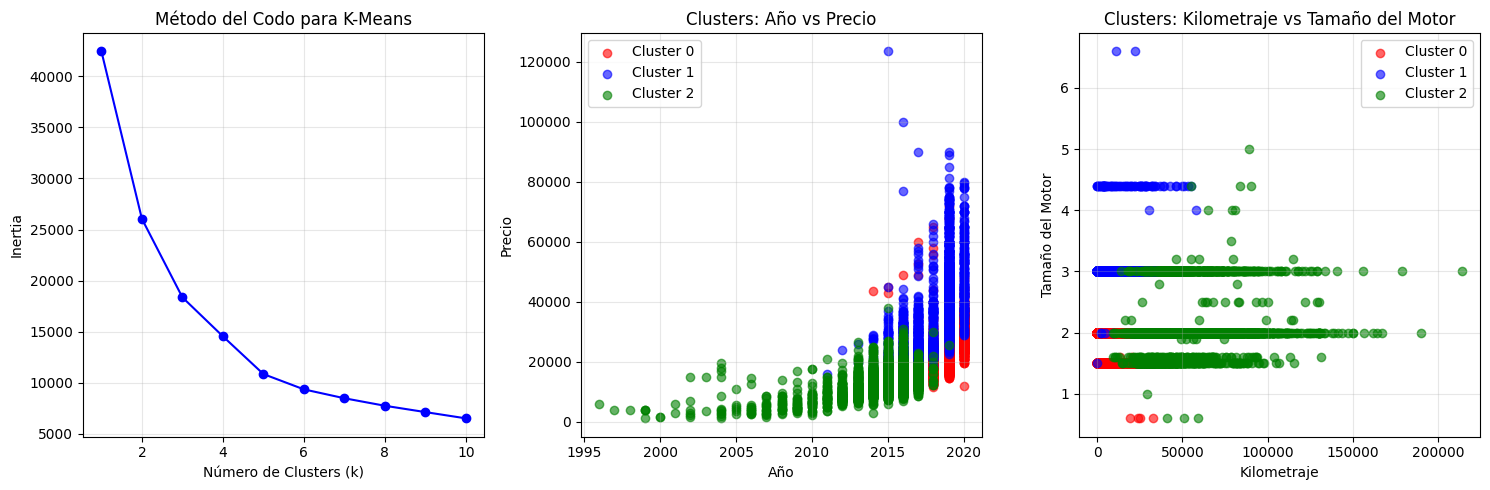

In [29]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inertia')
plt.title('Método del Codo para K-Means')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
colors = ['red', 'blue', 'green']
for i in range(3):
    cluster_data = df_cluster[df_cluster['cluster'] == i]
    plt.scatter(cluster_data['year'], cluster_data['price'], 
                c=colors[i], label=f'Cluster {i}', alpha=0.6)
plt.xlabel('Año')
plt.ylabel('Precio')
plt.title('Clusters: Año vs Precio')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
for i in range(3):
    cluster_data = df_cluster[df_cluster['cluster'] == i]
    plt.scatter(cluster_data['mileage'], cluster_data['engineSize'], 
                c=colors[i], label=f'Cluster {i}', alpha=0.6)
plt.xlabel('Kilometraje')
plt.ylabel('Tamaño del Motor')
plt.title('Clusters: Kilometraje vs Tamaño del Motor')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


=== COMPARACIÓN DE TODOS LOS MODELOS ===
                      Modelo           MSE      R²        MAE
0    Regresión Lineal Simple  8.140699e+07  0.3770  6068.5970
1  Regresión Lineal Múltiple  3.391755e+07  0.7404  3944.0781
2                      Ridge  3.391742e+07  0.7404  3943.9967
3                      Lasso  3.391763e+07  0.7404  3944.0477
4                Elastic Net  3.401592e+07  0.7397  3918.6779
5          Árbol de Decisión  7.627254e+06  0.9416  1908.1883
6              Random Forest  6.470862e+06  0.9505  1752.1858


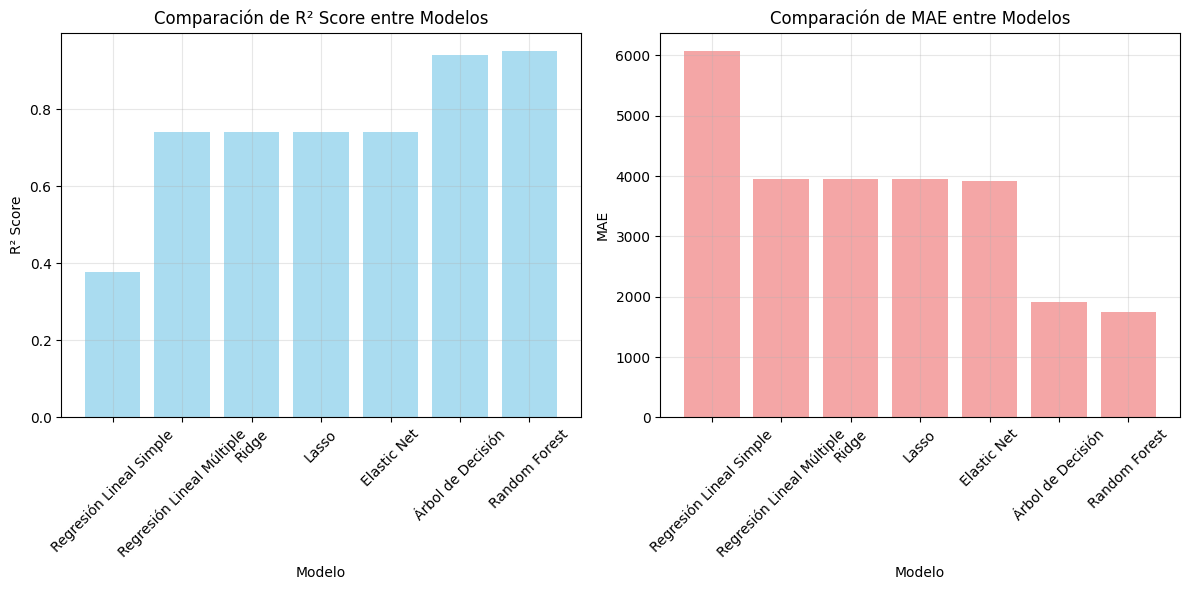


Mejor modelo según R²: Random Forest
Mejor modelo según MAE: Random Forest


In [30]:
modelos_comparacion = pd.DataFrame({
    'Modelo': ['Regresión Lineal Simple', 'Regresión Lineal Múltiple', 'Ridge', 
               'Lasso', 'Elastic Net', 'Árbol de Decisión', 'Random Forest'],
    'MSE': [mse_simple, mse_multiple, mse_ridge, mse_lasso, mse_elastic, mse_tree, mse_rf],
    'R²': [r2_simple, r2_multiple, r2_ridge, r2_lasso, r2_elastic, r2_tree, r2_rf],
    'MAE': [mae_simple, mae_multiple, mae_ridge, mae_lasso, mae_elastic, mae_tree, mae_rf]
})

print("=== COMPARACIÓN DE TODOS LOS MODELOS ===")
print(modelos_comparacion.round(4))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(modelos_comparacion['Modelo'], modelos_comparacion['R²'], color='skyblue', alpha=0.7)
plt.xlabel('Modelo')
plt.ylabel('R² Score')
plt.title('Comparación de R² Score entre Modelos')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(modelos_comparacion['Modelo'], modelos_comparacion['MAE'], color='lightcoral', alpha=0.7)
plt.xlabel('Modelo')
plt.ylabel('MAE')
plt.title('Comparación de MAE entre Modelos')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nMejor modelo según R²: {modelos_comparacion.loc[modelos_comparacion['R²'].idxmax(), 'Modelo']}")
print(f"Mejor modelo según MAE: {modelos_comparacion.loc[modelos_comparacion['MAE'].idxmin(), 'Modelo']}")


In [31]:
from sklearn.cluster import DBSCAN

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=4)
dbscan_labels = dbscan.fit_predict(X_cluster_scaled)

df_dbscan = df_clean.copy()
df_dbscan['dbscan_cluster'] = dbscan_labels

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print("=== DBSCAN CLUSTERING ===")
print(f"Número de clusters: {n_clusters}")
print(f"Puntos de ruido: {n_noise}")

print("\nEstadísticas por cluster:")
cluster_stats = df_dbscan[df_dbscan['dbscan_cluster'] != -1].groupby('dbscan_cluster')[clustering_features].mean()
print(cluster_stats)


=== DBSCAN CLUSTERING ===
Número de clusters: 13
Puntos de ruido: 116

Estadísticas por cluster:
                       year        mileage         price  engineSize
dbscan_cluster                                                      
0               2017.100447   26655.708378  20678.139022    2.000000
1               2017.284048   22676.599334  31834.943773    3.000000
2               2017.319444   21799.576058  16181.606481    1.506812
3               2018.880000    5425.200000  67540.040000    4.400000
4               2019.000000    1523.250000  86229.500000    4.400000
5               2016.250000   24951.812500  34754.062500    4.400000
6               2018.857143    2407.000000  68020.857143    1.500000
7               2014.750000   44115.500000  42343.000000    1.500000
8               2007.833333   80126.666667   8311.777778    3.000000
9               2015.000000  107717.500000  12448.750000    3.000000
10              2005.250000   60838.750000   4462.000000    2.000000
11    

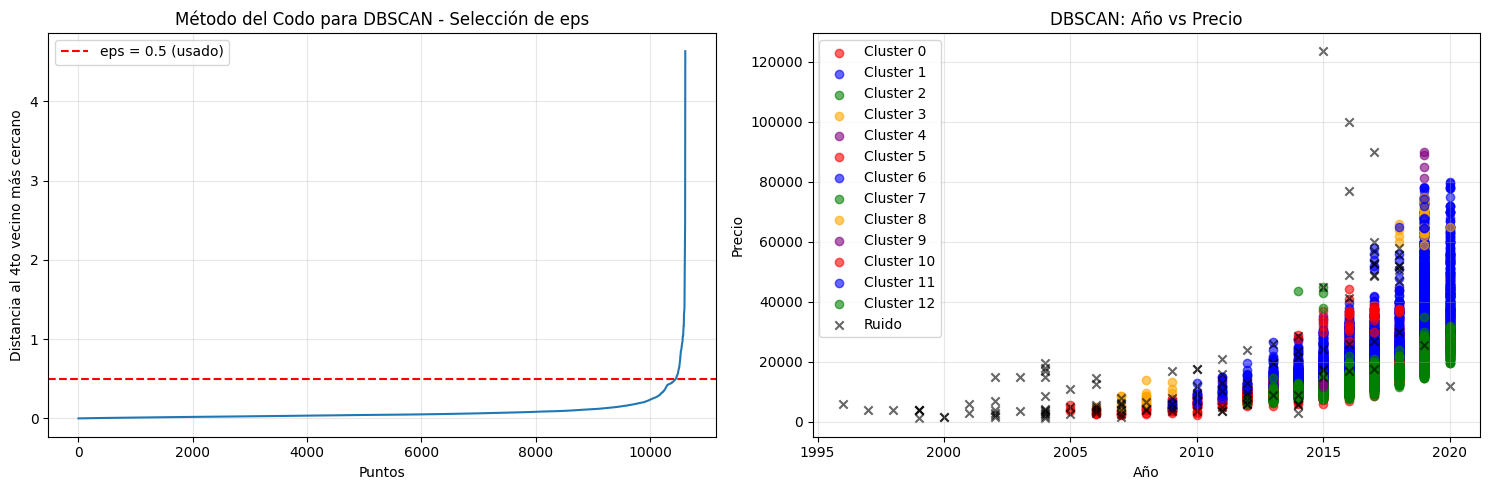

Distancia al 4to vecino más cercano:
Percentil 50: 0.044
Percentil 70: 0.070
Percentil 80: 0.094
Percentil 90: 0.158
Valor usado (eps=0.5): 0.500


In [32]:
from sklearn.neighbors import NearestNeighbors

# Método del codo para DBSCAN
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X_cluster_scaled)
distances, indices = neighbors_fit.kneighbors(X_cluster_scaled)

# Ordenar las distancias
distances = np.sort(distances[:, 3], axis=0)

plt.figure(figsize=(15, 5))

# Subplot 1: Método del codo para DBSCAN
plt.subplot(1, 2, 1)
plt.plot(distances)
plt.xlabel('Puntos')
plt.ylabel('Distancia al 4to vecino más cercano')
plt.title('Método del Codo para DBSCAN - Selección de eps')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.5, color='r', linestyle='--', label='eps = 0.5 (usado)')
plt.legend()

# Subplot 2: DBSCAN - Año vs Precio
plt.subplot(1, 2, 2)
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i in range(n_clusters):
    cluster_data = df_dbscan[df_dbscan['dbscan_cluster'] == i]
    plt.scatter(cluster_data['year'], cluster_data['price'], 
                c=colors[i % len(colors)], label=f'Cluster {i}', alpha=0.6)
# Puntos de ruido
noise_data = df_dbscan[df_dbscan['dbscan_cluster'] == -1]
if len(noise_data) > 0:
    plt.scatter(noise_data['year'], noise_data['price'], 
                c='black', marker='x', label='Ruido', alpha=0.6)
plt.xlabel('Año')
plt.ylabel('Precio')
plt.title('DBSCAN: Año vs Precio')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Mostrar algunos valores de distancia para referencia
print("Distancia al 4to vecino más cercano:")
print(f"Percentil 50: {np.percentile(distances, 50):.3f}")
print(f"Percentil 70: {np.percentile(distances, 70):.3f}")
print(f"Percentil 80: {np.percentile(distances, 80):.3f}")
print(f"Percentil 90: {np.percentile(distances, 90):.3f}")
print(f"Valor usado (eps=0.5): 0.500")


In [33]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calcular todas las métricas para K-Means
silhouette_kmeans = silhouette_score(X_cluster_scaled, cluster_labels)
davies_bouldin_kmeans = davies_bouldin_score(X_cluster_scaled, cluster_labels)
calinski_harabasz_kmeans = calinski_harabasz_score(X_cluster_scaled, cluster_labels)

print("=== MÉTRICAS COMPLETAS DE CLUSTERING ===")
print("\n--- K-MEANS ---")
print(f"Silhouette Score: {silhouette_kmeans:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin_kmeans:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_kmeans:.4f}")

# Calcular métricas para DBSCAN (solo clusters, excluyendo ruido)
if n_clusters > 0:
    # Filtrar solo los puntos que no son ruido
    mask = dbscan_labels != -1
    X_filtered = X_cluster_scaled[mask]
    labels_filtered = dbscan_labels[mask]
    
    if len(set(labels_filtered)) > 1:  # Necesitamos al menos 2 clusters
        silhouette_dbscan = silhouette_score(X_filtered, labels_filtered)
        davies_bouldin_dbscan = davies_bouldin_score(X_filtered, labels_filtered)
        calinski_harabasz_dbscan = calinski_harabasz_score(X_filtered, labels_filtered)
        
        print("\n--- DBSCAN ---")
        print(f"Silhouette Score: {silhouette_dbscan:.4f}")
        print(f"Davies-Bouldin Score: {davies_bouldin_dbscan:.4f}")
        print(f"Calinski-Harabasz Score: {calinski_harabasz_dbscan:.4f}")
    else:
        silhouette_dbscan = davies_bouldin_dbscan = calinski_harabasz_dbscan = 0
        print("\n--- DBSCAN ---")
        print("Métricas no calculables (menos de 2 clusters)")
else:
    silhouette_dbscan = davies_bouldin_dbscan = calinski_harabasz_dbscan = 0
    print("\n--- DBSCAN ---")
    print("Métricas no calculables (sin clusters)")

print(f"\n=== INTERPRETACIÓN DE MÉTRICAS ===")
print(f"\nSilhouette Score (rango: -1 a 1, mayor es mejor):")
print(f"- > 0.7: Clusters bien definidos")
print(f"- 0.5-0.7: Clusters razonables")
print(f"- 0.2-0.5: Clusters débiles")
print(f"- < 0.2: Clusters mal definidos")

print(f"\nDavies-Bouldin Score (rango: 0 a ∞, menor es mejor):")
print(f"- < 0.5: Clusters muy bien separados")
print(f"- 0.5-1.0: Clusters bien separados")
print(f"- 1.0-2.0: Clusters moderadamente separados")
print(f"- > 2.0: Clusters mal separados")

print(f"\nCalinski-Harabasz Score (rango: 0 a ∞, mayor es mejor):")
print(f"- > 1000: Clusters muy bien definidos")
print(f"- 500-1000: Clusters bien definidos")
print(f"- 100-500: Clusters moderadamente definidos")
print(f"- < 100: Clusters mal definidos")


=== MÉTRICAS COMPLETAS DE CLUSTERING ===

--- K-MEANS ---
Silhouette Score: 0.4040
Davies-Bouldin Score: 0.9084
Calinski-Harabasz Score: 6970.7349

--- DBSCAN ---
Silhouette Score: 0.1349
Davies-Bouldin Score: 0.8702
Calinski-Harabasz Score: 482.1196

=== INTERPRETACIÓN DE MÉTRICAS ===

Silhouette Score (rango: -1 a 1, mayor es mejor):
- > 0.7: Clusters bien definidos
- 0.5-0.7: Clusters razonables
- 0.2-0.5: Clusters débiles
- < 0.2: Clusters mal definidos

Davies-Bouldin Score (rango: 0 a ∞, menor es mejor):
- < 0.5: Clusters muy bien separados
- 0.5-1.0: Clusters bien separados
- 1.0-2.0: Clusters moderadamente separados
- > 2.0: Clusters mal separados

Calinski-Harabasz Score (rango: 0 a ∞, mayor es mejor):
- > 1000: Clusters muy bien definidos
- 500-1000: Clusters bien definidos
- 100-500: Clusters moderadamente definidos
- < 100: Clusters mal definidos


=== TABLA COMPARATIVA COMPLETA ===
    Método  Silhouette Score  Davies-Bouldin Score  Calinski-Harabasz Score  \
0  K-Means            0.4040                0.9084                6970.7349   
1   DBSCAN            0.1349                0.8702                 482.1196   

   Número de Clusters  Puntos de Ruido  
0                   3                0  
1                  13              116  


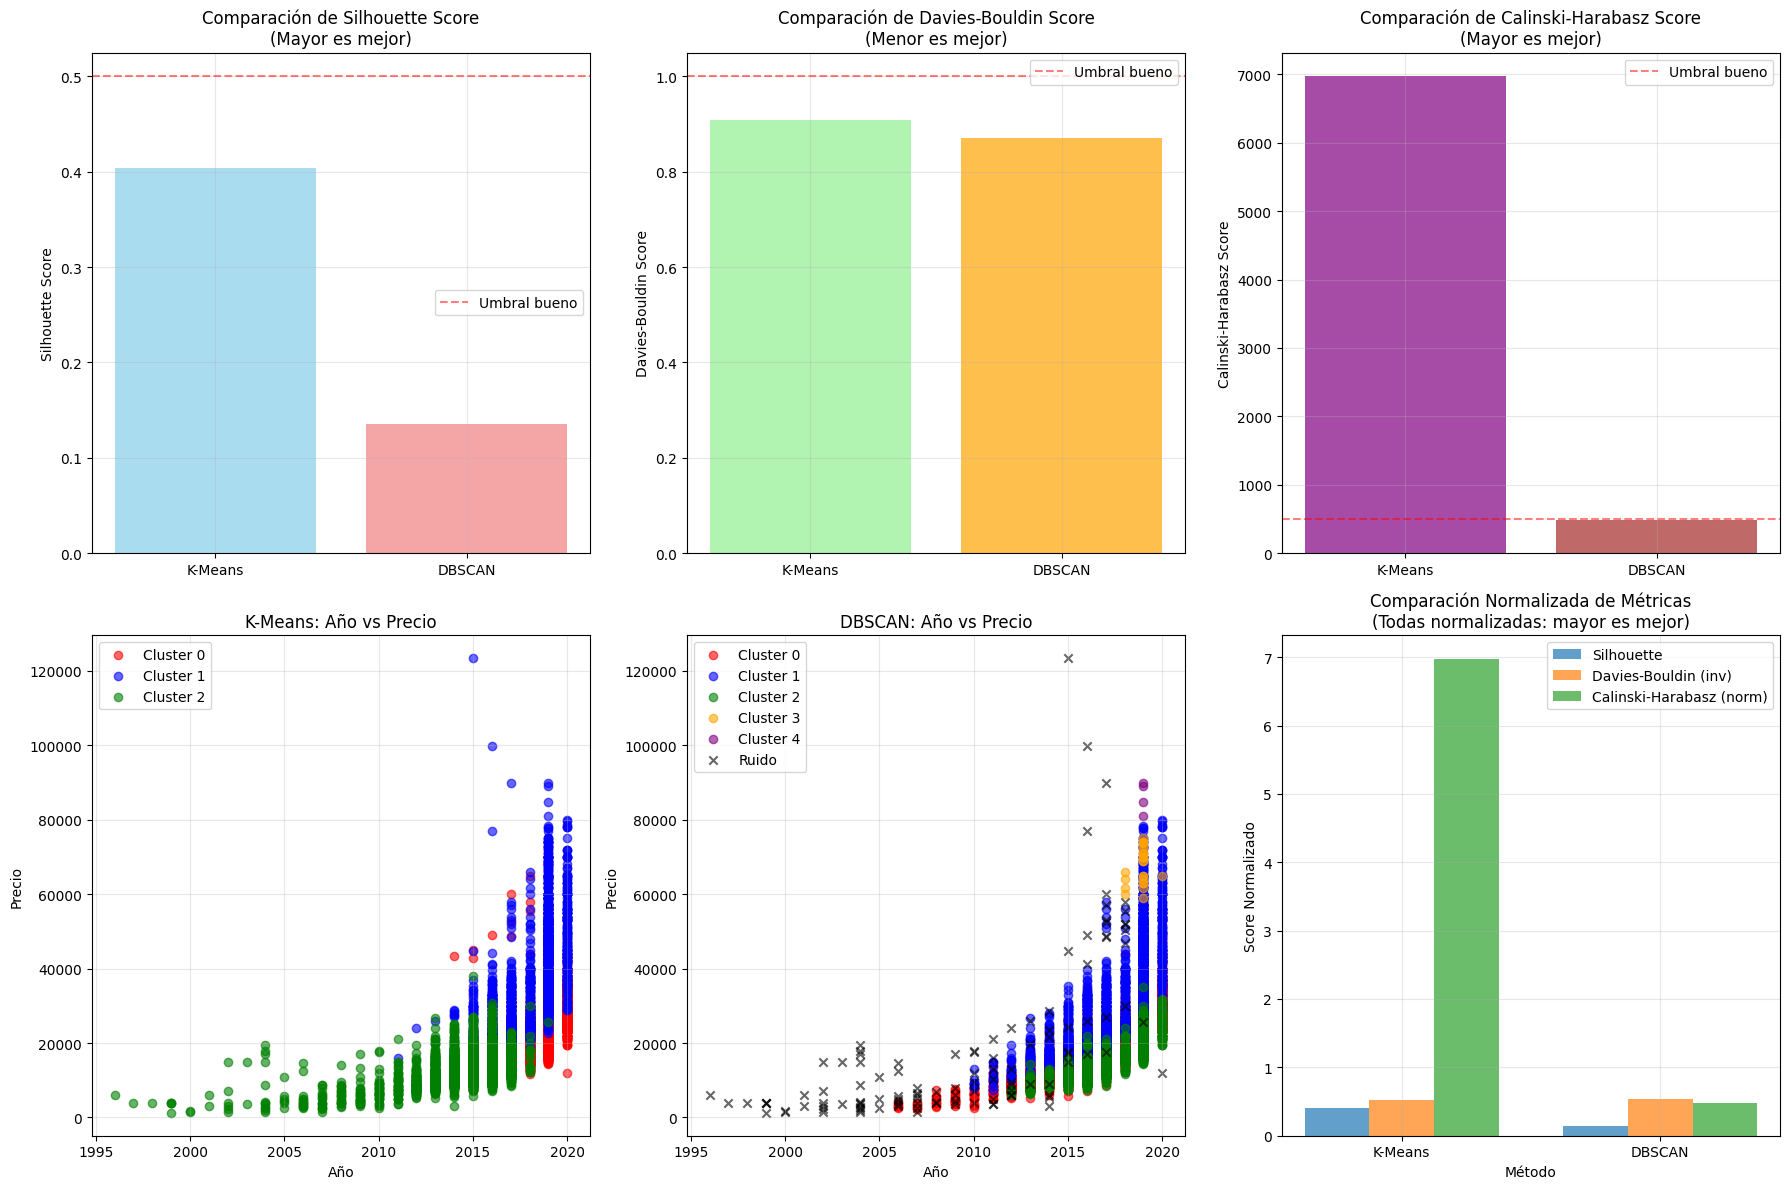


=== ANÁLISIS DETALLADO DE RESULTADOS ===

🏆 K-MEANS:
  - Silhouette Score: 0.4040 (Regular)
  - Davies-Bouldin Score: 0.9084 (Bueno)
  - Calinski-Harabasz Score: 6970.7349 (Excelente)
  - Clusters fijos: 3
  - No identifica outliers

🏆 DBSCAN:
  - Silhouette Score: 0.1349 (Malo)
  - Davies-Bouldin Score: 0.8702 (Bueno)
  - Calinski-Harabasz Score: 482.1196 (Regular)
  - Clusters encontrados: 13
  - Outliers identificados: 116

🎯 RESUMEN COMPARATIVO:
K-Means gana en 2 métricas
DBSCAN gana en 1 métricas

🏆 K-MEANS es el método de clustering más efectivo


In [34]:
# Crear tabla comparativa completa
clustering_metrics_comparison = pd.DataFrame({
    'Método': ['K-Means', 'DBSCAN'],
    'Silhouette Score': [silhouette_kmeans, silhouette_dbscan],
    'Davies-Bouldin Score': [davies_bouldin_kmeans, davies_bouldin_dbscan],
    'Calinski-Harabasz Score': [calinski_harabasz_kmeans, calinski_harabasz_dbscan],
    'Número de Clusters': [3, n_clusters],
    'Puntos de Ruido': [0, n_noise]
})

print("=== TABLA COMPARATIVA COMPLETA ===")
print(clustering_metrics_comparison.round(4))

# Visualización comparativa de todas las métricas
plt.figure(figsize=(18, 12))

# Subplot 1: Silhouette Score
plt.subplot(2, 3, 1)
plt.bar(clustering_metrics_comparison['Método'], clustering_metrics_comparison['Silhouette Score'], 
        color=['skyblue', 'lightcoral'], alpha=0.7)
plt.ylabel('Silhouette Score')
plt.title('Comparación de Silhouette Score\n(Mayor es mejor)')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Umbral bueno')
plt.legend()

# Subplot 2: Davies-Bouldin Score
plt.subplot(2, 3, 2)
plt.bar(clustering_metrics_comparison['Método'], clustering_metrics_comparison['Davies-Bouldin Score'], 
        color=['lightgreen', 'orange'], alpha=0.7)
plt.ylabel('Davies-Bouldin Score')
plt.title('Comparación de Davies-Bouldin Score\n(Menor es mejor)')
plt.grid(True, alpha=0.3)
plt.axhline(y=1.0, color='red', linestyle='--', alpha=0.5, label='Umbral bueno')
plt.legend()

# Subplot 3: Calinski-Harabasz Score
plt.subplot(2, 3, 3)
plt.bar(clustering_metrics_comparison['Método'], clustering_metrics_comparison['Calinski-Harabasz Score'], 
        color=['purple', 'brown'], alpha=0.7)
plt.ylabel('Calinski-Harabasz Score')
plt.title('Comparación de Calinski-Harabasz Score\n(Mayor es mejor)')
plt.grid(True, alpha=0.3)
plt.axhline(y=500, color='red', linestyle='--', alpha=0.5, label='Umbral bueno')
plt.legend()

# Subplot 4: K-Means - Año vs Precio
plt.subplot(2, 3, 4)
colors_kmeans = ['red', 'blue', 'green']
for i in range(3):
    cluster_data = df_cluster[df_cluster['cluster'] == i]
    plt.scatter(cluster_data['year'], cluster_data['price'], 
                c=colors_kmeans[i], label=f'Cluster {i}', alpha=0.6)
plt.xlabel('Año')
plt.ylabel('Precio')
plt.title('K-Means: Año vs Precio')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 5: DBSCAN - Año vs Precio
plt.subplot(2, 3, 5)
colors_dbscan = ['red', 'blue', 'green', 'orange', 'purple']
for i in range(min(n_clusters, 5)):  # Mostrar máximo 5 clusters
    cluster_data = df_dbscan[df_dbscan['dbscan_cluster'] == i]
    plt.scatter(cluster_data['year'], cluster_data['price'], 
                c=colors_dbscan[i % len(colors_dbscan)], label=f'Cluster {i}', alpha=0.6)
# Puntos de ruido
noise_data = df_dbscan[df_dbscan['dbscan_cluster'] == -1]
if len(noise_data) > 0:
    plt.scatter(noise_data['year'], noise_data['price'], 
                c='black', marker='x', label='Ruido', alpha=0.6)
plt.xlabel('Año')
plt.ylabel('Precio')
plt.title('DBSCAN: Año vs Precio')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 6: Comparación normalizada de métricas
plt.subplot(2, 3, 6)
metrics_normalized = pd.DataFrame({
    'Método': ['K-Means', 'DBSCAN'],
    'Silhouette': [silhouette_kmeans, silhouette_dbscan],
    'Davies-Bouldin (invertido)': [1/(1+davies_bouldin_kmeans), 1/(1+davies_bouldin_dbscan)],  # Invertir para que mayor sea mejor
    'Calinski-Harabasz (normalizado)': [calinski_harabasz_kmeans/1000, calinski_harabasz_dbscan/1000]  # Normalizar
})

x = np.arange(len(metrics_normalized['Método']))
width = 0.25

plt.bar(x - width, metrics_normalized['Silhouette'], width, label='Silhouette', alpha=0.7)
plt.bar(x, metrics_normalized['Davies-Bouldin (invertido)'], width, label='Davies-Bouldin (inv)', alpha=0.7)
plt.bar(x + width, metrics_normalized['Calinski-Harabasz (normalizado)'], width, label='Calinski-Harabasz (norm)', alpha=0.7)

plt.xlabel('Método')
plt.ylabel('Score Normalizado')
plt.title('Comparación Normalizada de Métricas\n(Todas normalizadas: mayor es mejor)')
plt.xticks(x, metrics_normalized['Método'])
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis detallado de resultados
print(f"\n=== ANÁLISIS DETALLADO DE RESULTADOS ===")

print(f"\n🏆 K-MEANS:")
print(f"  - Silhouette Score: {silhouette_kmeans:.4f} ({'Excelente' if silhouette_kmeans > 0.7 else 'Bueno' if silhouette_kmeans > 0.5 else 'Regular' if silhouette_kmeans > 0.2 else 'Malo'})")
print(f"  - Davies-Bouldin Score: {davies_bouldin_kmeans:.4f} ({'Excelente' if davies_bouldin_kmeans < 0.5 else 'Bueno' if davies_bouldin_kmeans < 1.0 else 'Regular' if davies_bouldin_kmeans < 2.0 else 'Malo'})")
print(f"  - Calinski-Harabasz Score: {calinski_harabasz_kmeans:.4f} ({'Excelente' if calinski_harabasz_kmeans > 1000 else 'Bueno' if calinski_harabasz_kmeans > 500 else 'Regular' if calinski_harabasz_kmeans > 100 else 'Malo'})")
print(f"  - Clusters fijos: 3")
print(f"  - No identifica outliers")

print(f"\n🏆 DBSCAN:")
print(f"  - Silhouette Score: {silhouette_dbscan:.4f} ({'Excelente' if silhouette_dbscan > 0.7 else 'Bueno' if silhouette_dbscan > 0.5 else 'Regular' if silhouette_dbscan > 0.2 else 'Malo'})")
print(f"  - Davies-Bouldin Score: {davies_bouldin_dbscan:.4f} ({'Excelente' if davies_bouldin_dbscan < 0.5 else 'Bueno' if davies_bouldin_dbscan < 1.0 else 'Regular' if davies_bouldin_dbscan < 2.0 else 'Malo'})")
print(f"  - Calinski-Harabasz Score: {calinski_harabasz_dbscan:.4f} ({'Excelente' if calinski_harabasz_dbscan > 1000 else 'Bueno' if calinski_harabasz_dbscan > 500 else 'Regular' if calinski_harabasz_dbscan > 100 else 'Malo'})")
print(f"  - Clusters encontrados: {n_clusters}")
print(f"  - Outliers identificados: {n_noise}")

# Determinar el mejor método
kmeans_wins = 0
dbscan_wins = 0

if silhouette_kmeans > silhouette_dbscan:
    kmeans_wins += 1
else:
    dbscan_wins += 1

if davies_bouldin_kmeans < davies_bouldin_dbscan:
    kmeans_wins += 1
else:
    dbscan_wins += 1

if calinski_harabasz_kmeans > calinski_harabasz_dbscan:
    kmeans_wins += 1
else:
    dbscan_wins += 1

print(f"\n🎯 RESUMEN COMPARATIVO:")
print(f"K-Means gana en {kmeans_wins} métricas")
print(f"DBSCAN gana en {dbscan_wins} métricas")

if kmeans_wins > dbscan_wins:
    print(f"\n🏆 K-MEANS es el método de clustering más efectivo")
elif dbscan_wins > kmeans_wins:
    print(f"\n🏆 DBSCAN es el método de clustering más efectivo")
else:
    print(f"\n🤝 Ambos métodos tienen rendimiento similar")


=== COMPARACIÓN DE MÉTODOS DE CLUSTERING ===
    Método  Número de Clusters  Puntos de Ruido  Silhouette Score  \
0  K-Means                   3                0            0.4040   
1   DBSCAN                  13              116            0.1349   

        Inertia              Parámetros  
0  18356.645764                     k=3  
1           N/A  eps=0.5, min_samples=4  


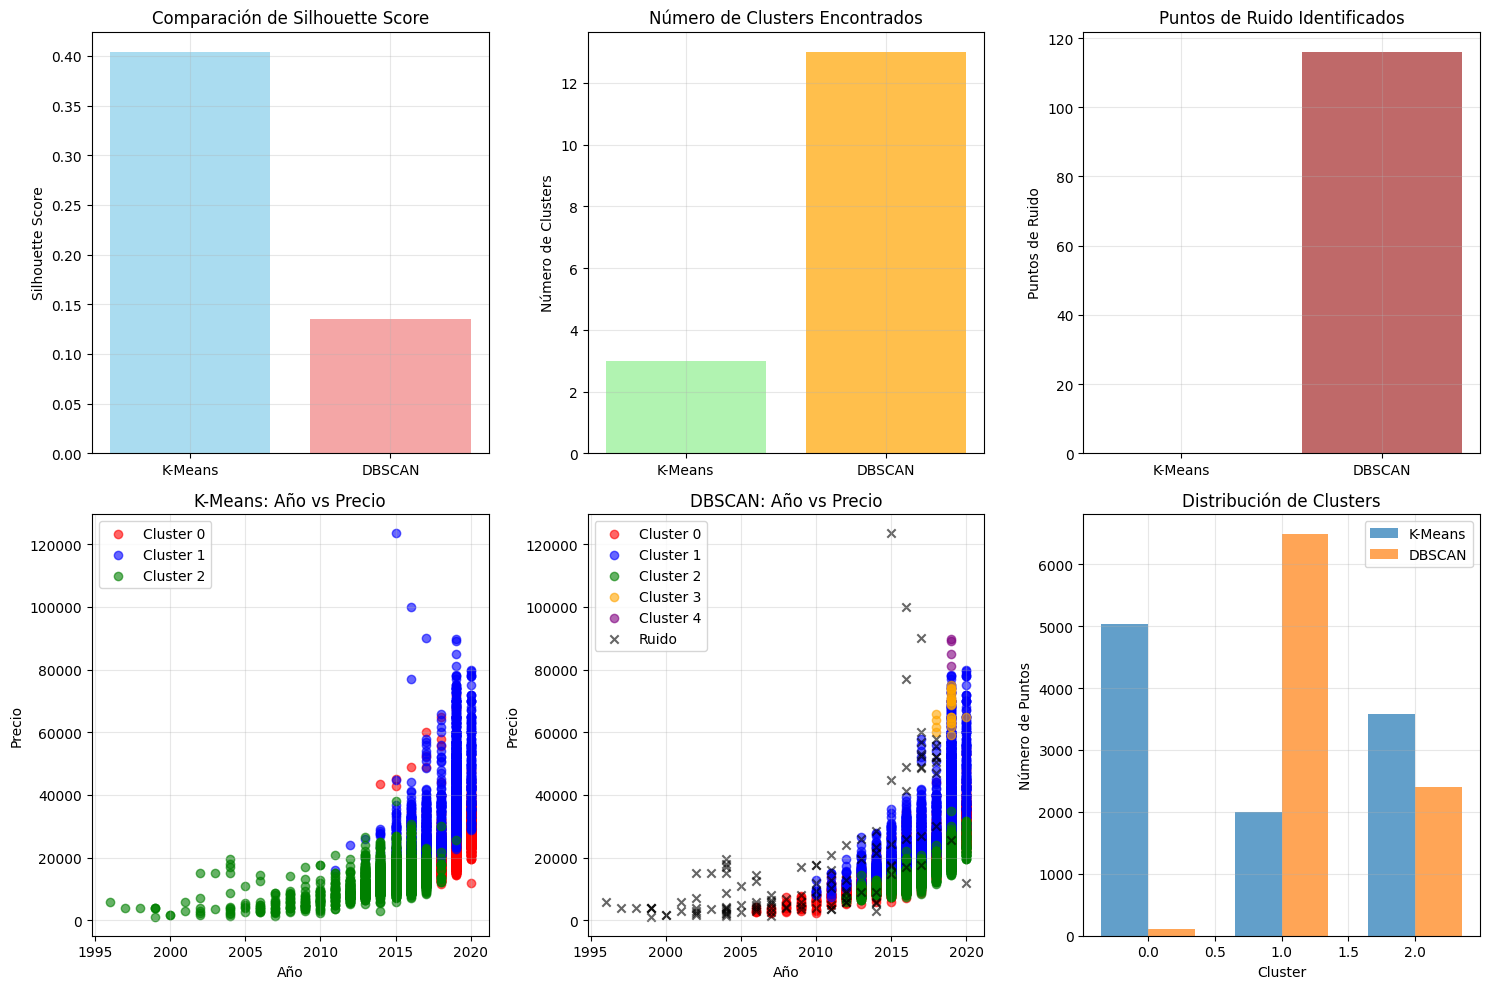


=== ANÁLISIS DE RESULTADOS ===
K-Means:
  - Silhouette Score: 0.4040 (Regular)
  - Clusters fijos: 3
  - No identifica outliers

DBSCAN:
  - Silhouette Score: 0.1349 (Malo)
  - Clusters encontrados: 13
  - Outliers identificados: 116

🏆 K-Means tiene mejor calidad de clustering (Silhouette Score más alto)


In [35]:
# Tabla comparativa de clustering
clustering_comparison = pd.DataFrame({
    'Método': ['K-Means', 'DBSCAN'],
    'Número de Clusters': [3, n_clusters],
    'Puntos de Ruido': [0, n_noise],
    'Silhouette Score': [silhouette_kmeans, silhouette_dbscan],
    'Inertia': [kmeans_final.inertia_, 'N/A'],
    'Parámetros': ['k=3', f'eps=0.5, min_samples=4']
})

print("=== COMPARACIÓN DE MÉTODOS DE CLUSTERING ===")
print(clustering_comparison.round(4))

# Visualización comparativa
plt.figure(figsize=(15, 10))

# Subplot 1: Silhouette Score
plt.subplot(2, 3, 1)
plt.bar(clustering_comparison['Método'], clustering_comparison['Silhouette Score'], 
        color=['skyblue', 'lightcoral'], alpha=0.7)
plt.ylabel('Silhouette Score')
plt.title('Comparación de Silhouette Score')
plt.grid(True, alpha=0.3)

# Subplot 2: Número de Clusters
plt.subplot(2, 3, 2)
plt.bar(clustering_comparison['Método'], clustering_comparison['Número de Clusters'], 
        color=['lightgreen', 'orange'], alpha=0.7)
plt.ylabel('Número de Clusters')
plt.title('Número de Clusters Encontrados')
plt.grid(True, alpha=0.3)

# Subplot 3: Puntos de Ruido
plt.subplot(2, 3, 3)
plt.bar(clustering_comparison['Método'], clustering_comparison['Puntos de Ruido'], 
        color=['purple', 'brown'], alpha=0.7)
plt.ylabel('Puntos de Ruido')
plt.title('Puntos de Ruido Identificados')
plt.grid(True, alpha=0.3)

# Subplot 4: K-Means - Año vs Precio
plt.subplot(2, 3, 4)
colors_kmeans = ['red', 'blue', 'green']
for i in range(3):
    cluster_data = df_cluster[df_cluster['cluster'] == i]
    plt.scatter(cluster_data['year'], cluster_data['price'], 
                c=colors_kmeans[i], label=f'Cluster {i}', alpha=0.6)
plt.xlabel('Año')
plt.ylabel('Precio')
plt.title('K-Means: Año vs Precio')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 5: DBSCAN - Año vs Precio
plt.subplot(2, 3, 5)
colors_dbscan = ['red', 'blue', 'green', 'orange', 'purple']
for i in range(min(n_clusters, 5)):  # Mostrar máximo 5 clusters
    cluster_data = df_dbscan[df_dbscan['dbscan_cluster'] == i]
    plt.scatter(cluster_data['year'], cluster_data['price'], 
                c=colors_dbscan[i % len(colors_dbscan)], label=f'Cluster {i}', alpha=0.6)
# Puntos de ruido
noise_data = df_dbscan[df_dbscan['dbscan_cluster'] == -1]
if len(noise_data) > 0:
    plt.scatter(noise_data['year'], noise_data['price'], 
                c='black', marker='x', label='Ruido', alpha=0.6)
plt.xlabel('Año')
plt.ylabel('Precio')
plt.title('DBSCAN: Año vs Precio')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 6: Comparación de distribuciones
plt.subplot(2, 3, 6)
kmeans_counts = pd.Series(cluster_labels).value_counts().sort_index()
dbscan_counts = pd.Series(dbscan_labels).value_counts().sort_index()

x_pos = np.arange(len(kmeans_counts))
width = 0.35

plt.bar(x_pos - width/2, kmeans_counts.values, width, label='K-Means', alpha=0.7)
plt.bar(x_pos + width/2, dbscan_counts.values[:len(kmeans_counts)], width, label='DBSCAN', alpha=0.7)
plt.xlabel('Cluster')
plt.ylabel('Número de Puntos')
plt.title('Distribución de Clusters')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis de resultados
print(f"\n=== ANÁLISIS DE RESULTADOS ===")
print(f"K-Means:")
print(f"  - Silhouette Score: {silhouette_kmeans:.4f} ({'Excelente' if silhouette_kmeans > 0.7 else 'Bueno' if silhouette_kmeans > 0.5 else 'Regular' if silhouette_kmeans > 0.2 else 'Malo'})")
print(f"  - Clusters fijos: 3")
print(f"  - No identifica outliers")

print(f"\nDBSCAN:")
print(f"  - Silhouette Score: {silhouette_dbscan:.4f} ({'Excelente' if silhouette_dbscan > 0.7 else 'Bueno' if silhouette_dbscan > 0.5 else 'Regular' if silhouette_dbscan > 0.2 else 'Malo'})")
print(f"  - Clusters encontrados: {n_clusters}")
print(f"  - Outliers identificados: {n_noise}")

if silhouette_kmeans > silhouette_dbscan:
    print(f"\n🏆 K-Means tiene mejor calidad de clustering (Silhouette Score más alto)")
elif silhouette_dbscan > silhouette_kmeans:
    print(f"\n🏆 DBSCAN tiene mejor calidad de clustering (Silhouette Score más alto)")
else:
    print(f"\n🤝 Ambos métodos tienen calidad similar de clustering")
